# Sentiment Analysis
----

## Data Load

In [1]:
import pandas as pd

df_corpus = pd.read_pickle('corpus/economics.corpus')
df_corpus.sample(5)

,AvgTone,EventID,sentiment,text,url
1165,3.340136,517174895,1,"Indonesia's central bank, in a bid to expand t...",1996 http://www.businesstimes.com.sg/bankin...
1099,0.000000,539103641,0,Indonesia's finance minister said S&P Global R...,1921 http://www.businesstimes.com.sg/govern...
554,-1.559020,682480845,-1,Eclipse-chasers are a dedicated crew of scient...,1380 http://www.businesstimes.com.sg/life-c...
213,-6.037736,755579948,-1,A family of six launched suicide attacks on Ch...,846 http://www.businessinsider.com/suicide-...
208,-0.220264,753467194,0,By Ben Blanchard\n\nBEIJING (Reuters) - No are...,976 http://www.businessinsider.com/r-china-...


In [2]:
df_corpus.shape

(1207, 5)

## Data Preparation

In [5]:
from sklearn.model_selection import train_test_split

X = df_corpus.text
y = df_corpus.sentiment

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [6]:
from nltk.stem.porter import PorterStemmer
import re

porter_stemmer = PorterStemmer()

def custom_tokenizer(str_input):
    words = re.sub(r"[^a-z]|\b\w{0,3}\b", " ", str_input).lower().split()
#     words = [porter_stemmer.stem(word) for word in words]
    return words


In [7]:
# ekstraksi fitur

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import word_tokenize          
from sklearn.feature_extraction import text

my_stop_words = text.ENGLISH_STOP_WORDS.union(["jakarta","jokowi",'said','says','just',
                                               "widodo","joko",'singapore','www','com'
                                               'indonesia','indonesians','bali','japan','korea',
                                               'indonesian','thailand','china', 'asia', 'asian',
                                               'vietnam','australian','australia', 'york','s','java','chinese',
                                               'india','malaysia','hong'])
my_stop_words = my_stop_words.union(["january","february","march",'april','may','june','july','august','september','october','november','december'])

my_stop_words = my_stop_words.union(["sunday","monday","tuesday",'thursday','wednesday','friday','year','years'
                                     'days','week','weeks','day','date','time'])


vectorizer = TfidfVectorizer(analyzer=u'word', tokenizer=custom_tokenizer, stop_words=my_stop_words, min_df=0.05, max_df=0.8, lowercase=True)
X = vectorizer.fit_transform(X_train)

X_train_dtm = vectorizer.transform(X_train)

In [8]:
pd.DataFrame(X_train_dtm.toarray(), columns=vectorizer.get_feature_names())

,able,access,according,account,accused,achieve,action,actions,activists,activities,...,women,work,worked,workers,working,world,worst,worth,writing,years
0,0.000000,0.000000,0.049947,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.059603,0.000000,0.000000,0.070073,0.043020,0.000000,0.000000,0.000000,0.046236
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.102264,0.000000,0.000000,0.000000,0.073812,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.036465,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.028329,0.000000,0.000000,0.033306,0.000000,0.000000,0.000000,0.000000,0.021976
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.062285,0.000000,0.000000,0.000000,0.033470
5,0.000000,0.000000,0.039555,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.034070,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.038811,0.077957,0.111404,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.017754,0.000000,0.000000,0.000000,0.076324
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.087126,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.108329,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# K-Means Clustering 
----

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

true_k = 8
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X_train_dtm)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

    
for i in range(true_k):
    
    t = []
    for ind in order_centroids[i, :40]:
        t.append(terms[ind])
    
    print("Cluster %d:" % i, ','.join(t),'\n')


Top terms per cluster:
Cluster 0: president,reuters,government,minister,rights,people,court,reporting,media,foreign,told,editing,mining,south,country,police,state,muslim,military,political,trump,election,officials,security,trade,death,ministry,human,company,social,official,statement,city,years,party,workers,million,world,authorities,island 

Cluster 1: palm,deforestation,plantations,forest,sustainable,land,companies,sustainability,supply,company,industry,plantation,environmental,policy,group,chain,cent,report,greenpeace,production,mongabay,forests,practices,million,tonnes,world,concessions,communities,campaign,association,european,farmers,hectares,business,haze,government,clearing,policies,producers,areas 

Cluster 2: cent,trade,exports,billion,growth,bank,rupiah,market,assets,million,revenue,rate,prices,government,month,products,reuters,stake,quarter,trillion,imports,export,sentifi,voices,trump,domestic,group,central,economy,income,budget,finance,told,country,south,according,company,i

In [10]:
Y = vectorizer.transform(["chrome browser to open."])
prediction = model.predict(Y)
print("Prediction", prediction)

Prediction [6]


In [11]:
#set up cluster names using a dict

cluster_names = {0: 'International Trade and Investment', 
                 1: 'Corporate Business', 
                 2: 'Energy', 
                 3: 'Security', 
                 4: 'Environment', 
                 5: 'Tourism',
                 6: 'Government Policy',
                 7: 'Forest'}


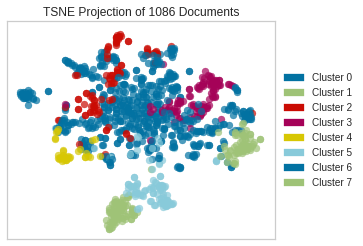

In [18]:
from yellowbrick.text import TSNEVisualizer

tsne = TSNEVisualizer()
tsne.fit(X_train_dtm, ["Cluster {}".format(c) for c in model.labels_])
tsne.poof()

# KNN Clustering 
----

In [13]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X_train_dtm)
distances, indices = nbrs.kneighbors(X_train_dtm)

/home/maziyank/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/base.py:217: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "


In [17]:
nbrs.kneighbors_graph(X)

<1086x1086 sparse matrix of type '<class 'numpy.float64'>'
	with 2172 stored elements in Compressed Sparse Row format>